# Ejercicio PCA (Principal Component Analysis)
En este ejercicio vas a trabajar con un dataset de información de ciudadanos como el estado civil, número de hijos, qué gastos e ingresos tiene, etc...

Se cuenta con un target, que es si el ciudadano va a alquilar o a comprar una vivienda. Para ello,  con PCA

### Importamos librerias
Principales librerías que usarás durante el notebook.

In [56]:
# Manipulación y análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuraciones visuales
sns.set(style="whitegrid", palette="muted")


### Cargamos datos de entrada
1. Carga el csv *comprar_alquilar.csv*
2. Obtén la información básica: columnas, dimensiones, descripción de las variables, missings...

In [57]:
df = pd.read_csv('data/comprar_alquilar.csv')
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [58]:
df.drop_duplicates()

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [59]:
df.isnull().sum()

ingresos          0
gastos_comunes    0
pago_coche        0
gastos_otros      0
ahorros           0
vivienda          0
estado_civil      0
hijos             0
trabajo           0
comprar           0
dtype: int64

In [60]:
# Columnas y tipos
df.info()


# Ver valores únicos por columna (útil para columnas categóricas)
for col in df.columns:
    print(f"{col}: {df[col].nunique()} valores únicos")
    print(f"{col}: {df[col].duplicated()} valores duplicados") ######### no se si esta bien



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   ingresos        202 non-null    int64
 1   gastos_comunes  202 non-null    int64
 2   pago_coche      202 non-null    int64
 3   gastos_otros    202 non-null    int64
 4   ahorros         202 non-null    int64
 5   vivienda        202 non-null    int64
 6   estado_civil    202 non-null    int64
 7   hijos           202 non-null    int64
 8   trabajo         202 non-null    int64
 9   comprar         202 non-null    int64
dtypes: int64(10)
memory usage: 15.9 KB
ingresos: 199 valores únicos
ingresos: 0      False
1      False
2      False
3      False
4      False
       ...  
197    False
198     True
199    False
200    False
201    False
Name: ingresos, Length: 202, dtype: bool valores duplicados
gastos_comunes: 188 valores únicos
gastos_comunes: 0      False
1      False
2      False
3      

### Visualicemos las dimensiones
Realiza un análisis univariante. Realiza la gráfica que consideres para cada variable, diferenciando por colores el target (*comprar*).

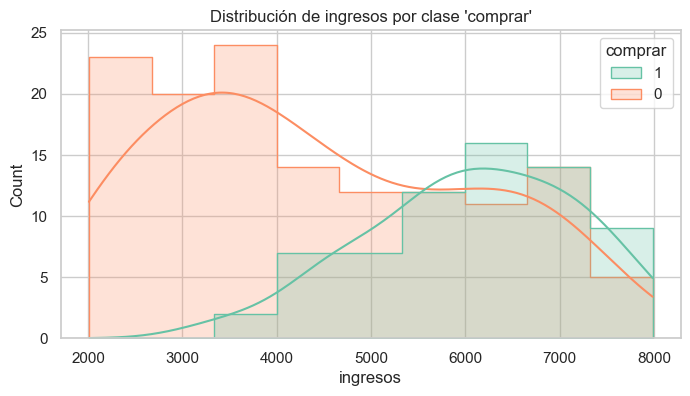

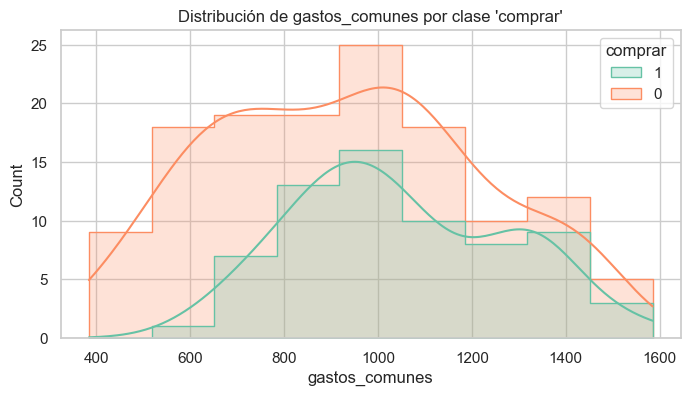

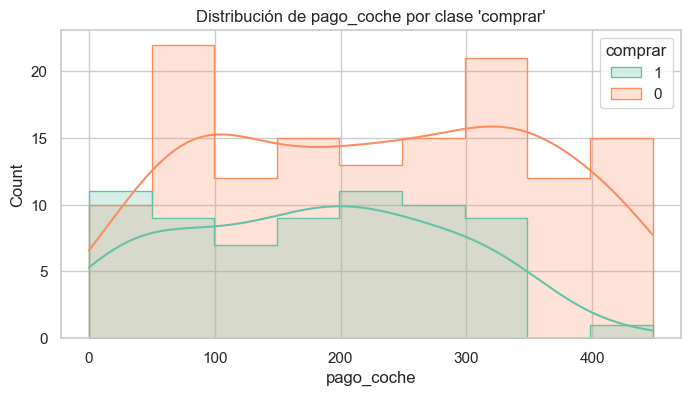

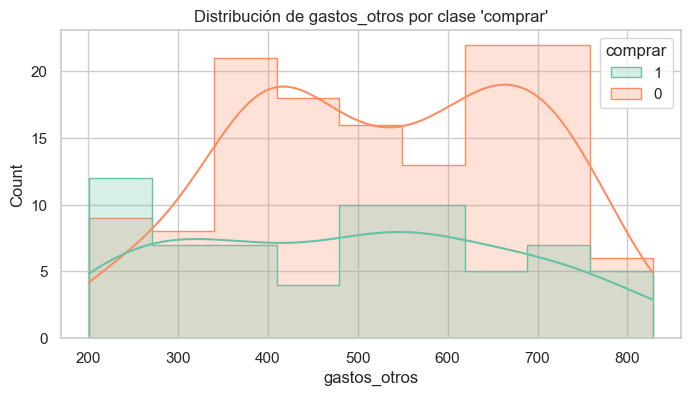

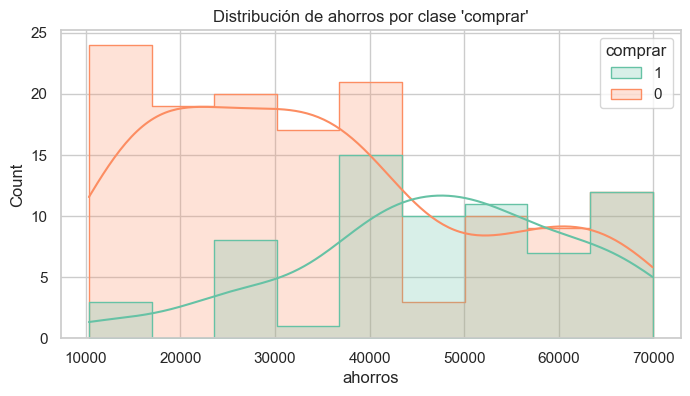

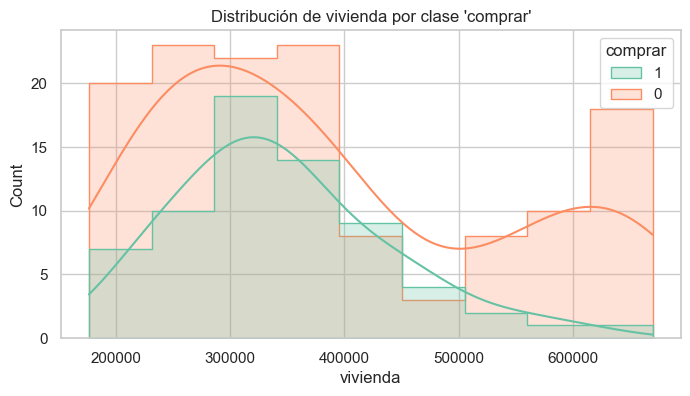

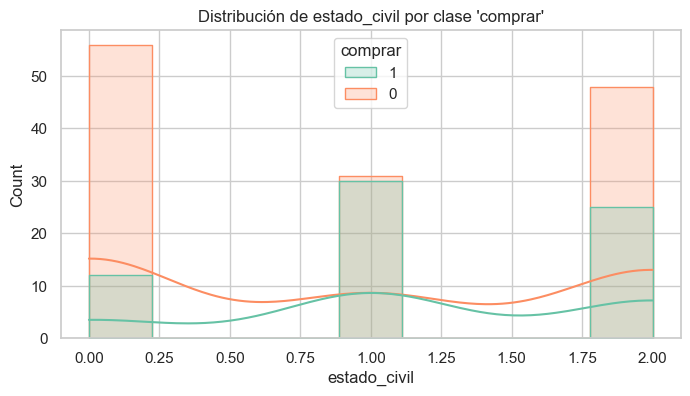

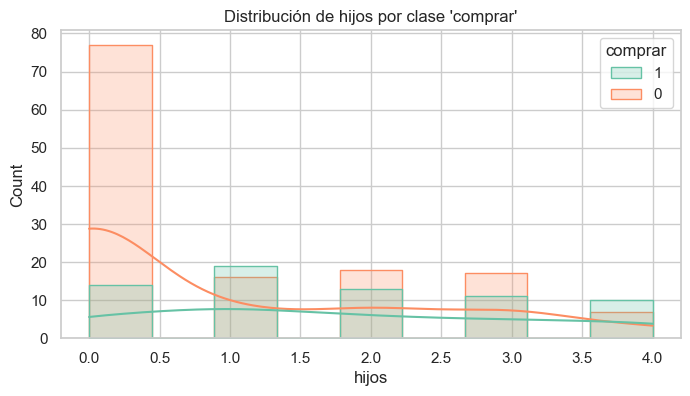

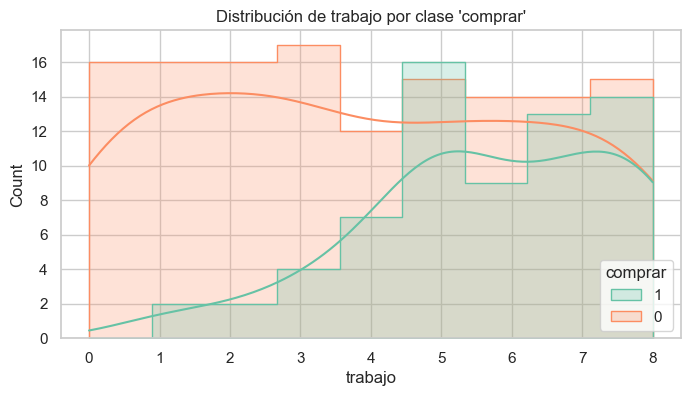

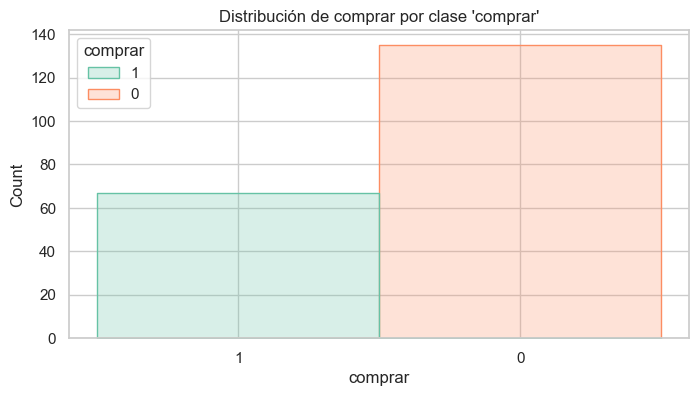

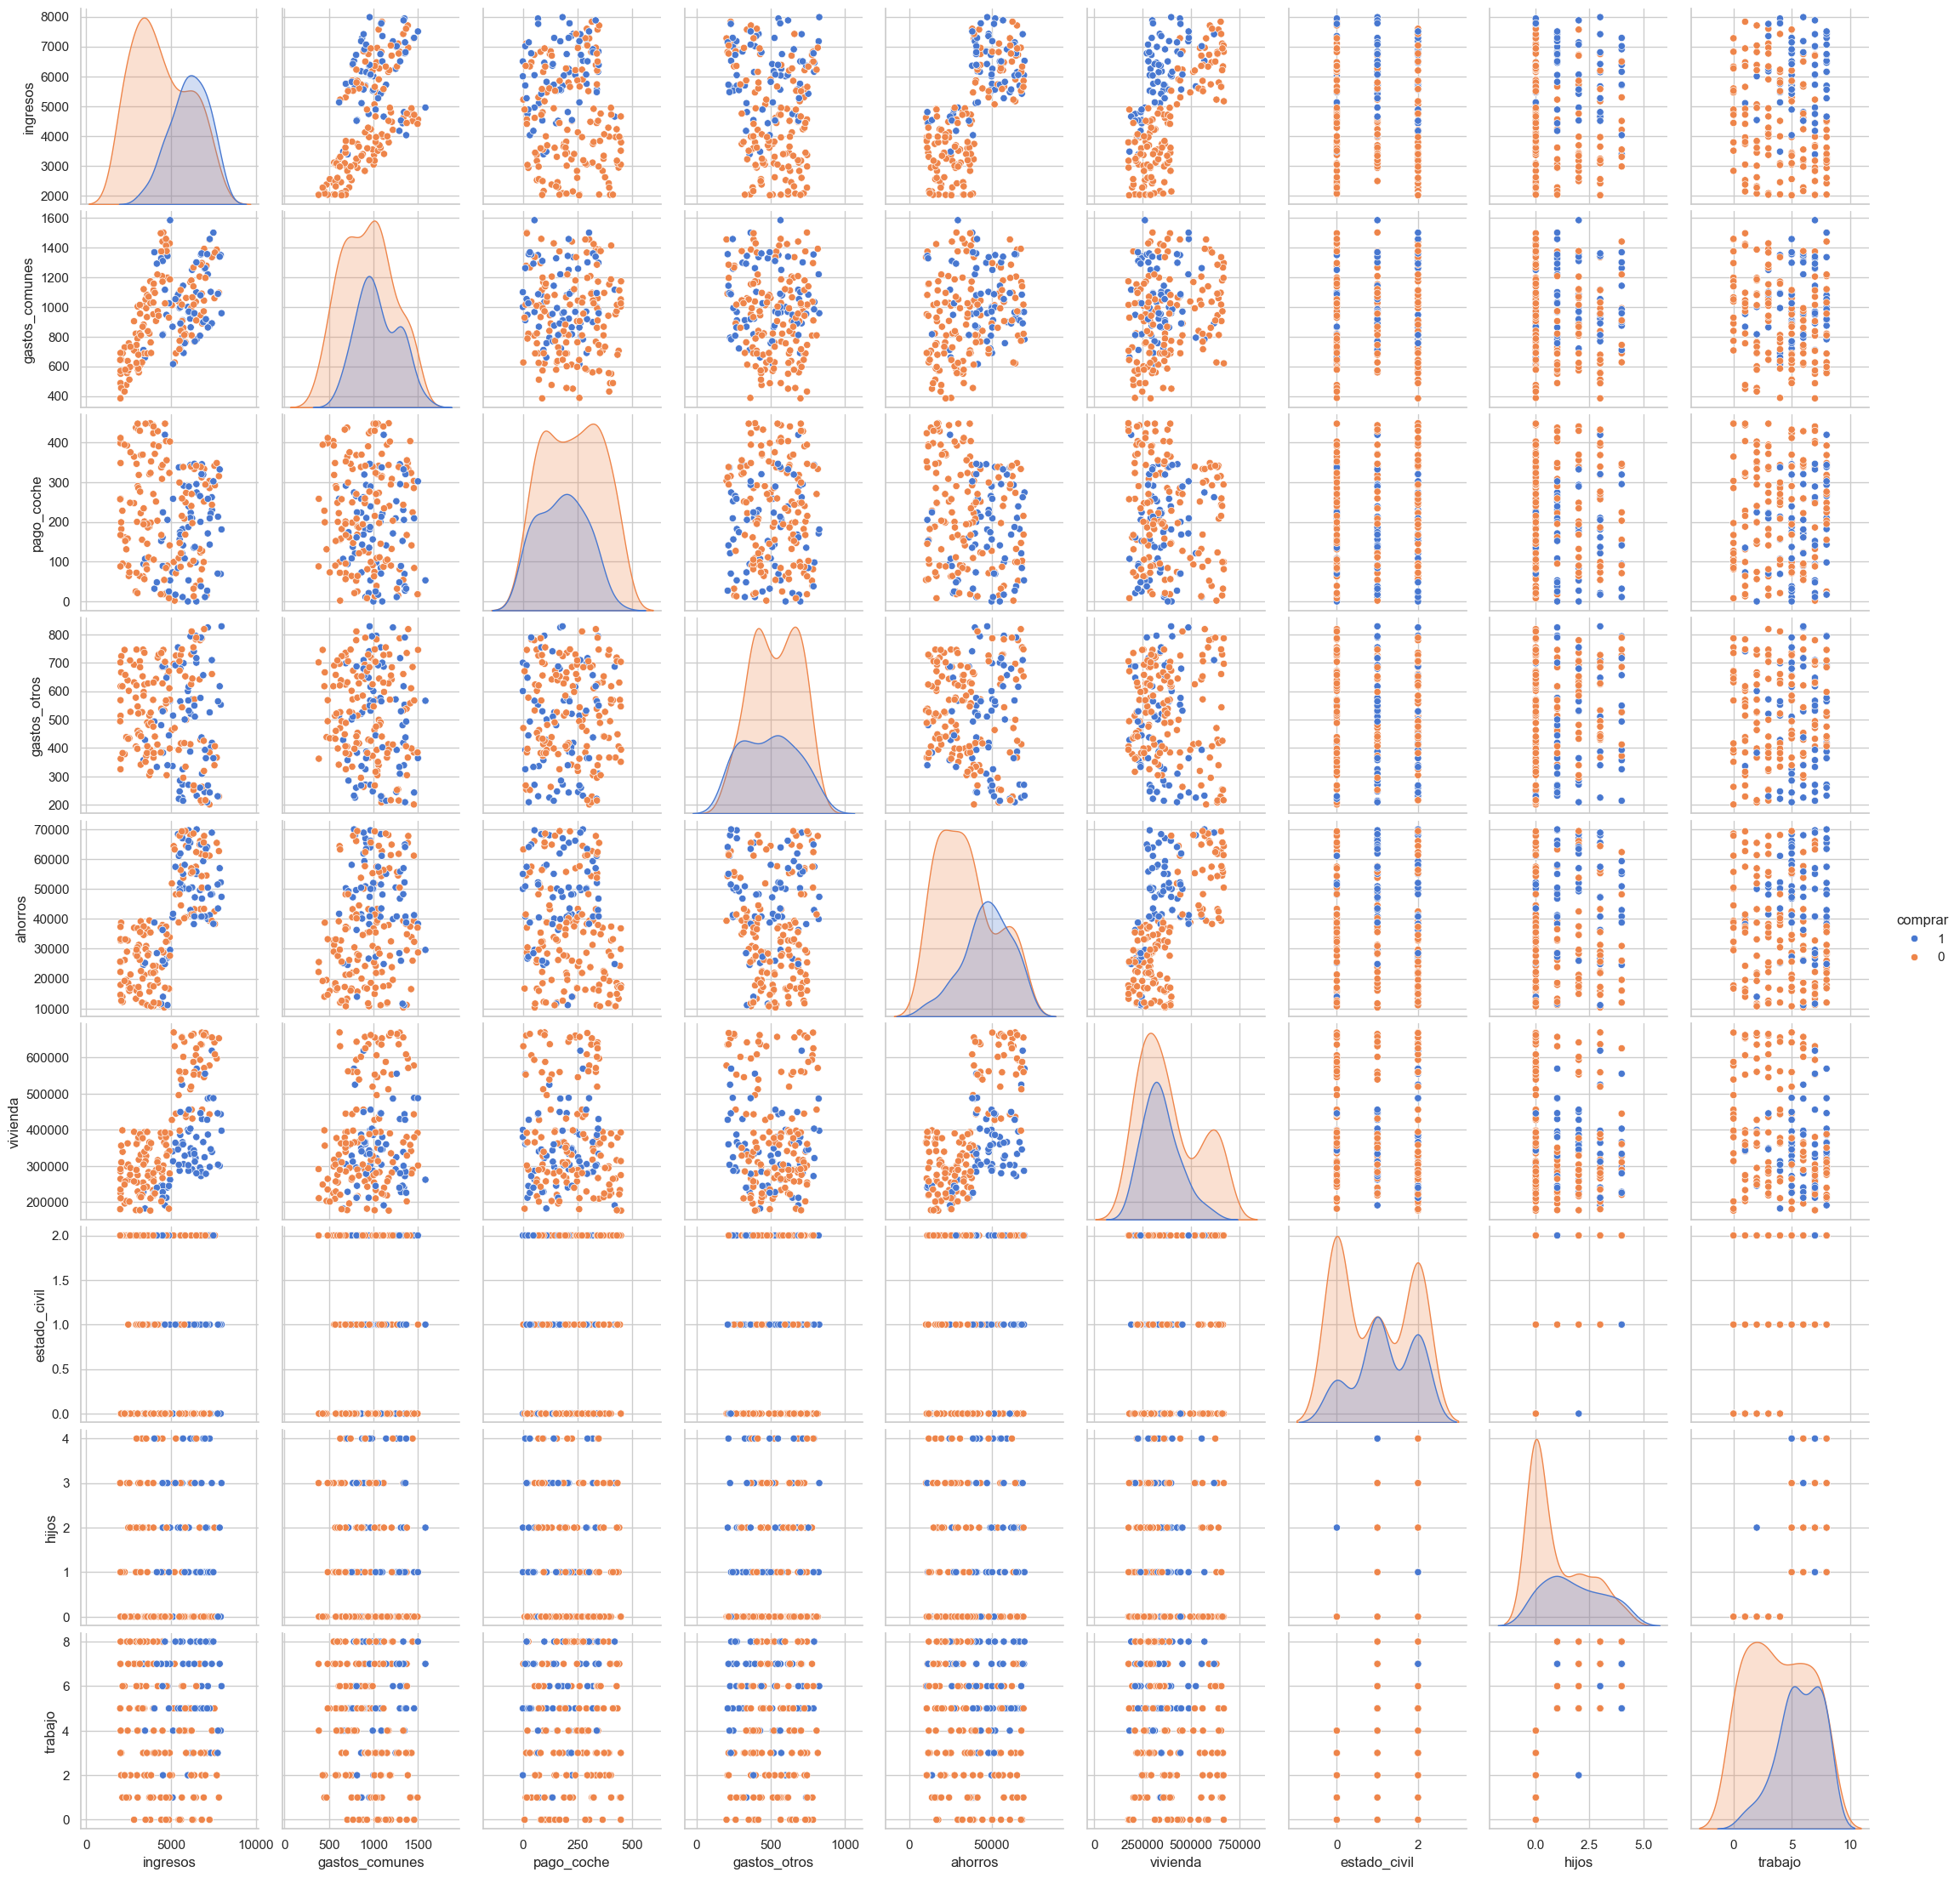

In [61]:
# Lista de columnas numéricas, excepto la target
columnas_numericas = df.select_dtypes(include=[np.number]).columns.tolist()

# Asegurarse de que 'comprar' esté como variable categórica
df['comprar'] = df['comprar'].astype(str)

# Gráficas univariantes para cada variable numérica

for col in columnas_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(data=df, x=col, hue='comprar', kde=True, element="step", palette="Set2")
    plt.title(f"Distribución de {col} por clase 'comprar'")
    plt.show()
    
sns.pairplot(data=df, hue='comprar')



## Estandariza los datos
Como el objetivo de estos primeros apartados no es encontrar el mejor modelo con el mejor accuracy, por sencillez, no es necesario dividir en train y test.

In [62]:
df

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...
197,3831,690,352,488,10723,363120,0,0,2,0
198,3961,1030,270,475,21880,280421,2,3,8,0
199,3184,955,276,684,35565,388025,1,3,8,0
200,3334,867,369,652,19985,376892,1,2,5,0


In [63]:
# Convertir de booleano a entero
df['comprar'] = df['comprar'].astype(int)


In [64]:
# Verifica si 'comprar' está entre las columnas numéricas
print(df.select_dtypes(include=[np.number]).columns)

Index(['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros',
       'vivienda', 'estado_civil', 'hijos', 'trabajo', 'comprar'],
      dtype='object')


In [65]:
from sklearn.preprocessing import StandardScaler

# Seleccionamos las variables numéricas (excluyendo 'comprar')
X = df.select_dtypes(include=[np.number]).drop(columns=['comprar'])

# Inicializamos el escalador
scaler = StandardScaler()

# Ajustamos y transformamos
X_scaled = scaler.fit_transform(X)

# Confirmamos dimensiones
print("Dimensiones después del escalado:", X_scaled.shape)


Dimensiones después del escalado: (202, 9)


## Aplicamos PCA
Aplica el algoritmo de PCA para 9 components, es decir, para todas las features

In [66]:
from sklearn.decomposition import PCA

# Inicializar PCA con 9 componentes
pca = PCA(n_components=9)

# Ajustar el modelo y transformar los datos
X_pca = pca.fit_transform(X_scaled)

# Mostrar dimensiones del resultado
print("Dimensiones del resultado PCA:", X_pca.shape)


Dimensiones del resultado PCA: (202, 9)


In [67]:
pca.components_

array([[ 4.93720326e-01,  3.18228652e-01, -1.23770585e-01,
        -1.11875722e-01,  4.44650306e-01,  4.62608605e-01,
        -2.52278902e-01, -2.59858682e-01, -2.90247540e-01],
       [ 3.06958523e-01,  1.47372634e-01, -9.16409584e-02,
         1.11593405e-04,  2.88434882e-01,  1.48984886e-01,
         4.69043960e-01,  5.21893872e-01,  5.27155638e-01],
       [-9.14192492e-02, -3.63453156e-01, -5.16144106e-01,
         7.01985912e-01,  1.91767355e-01,  1.40513292e-01,
        -1.72884784e-01,  1.12183561e-01, -3.69101842e-02],
       [ 1.11222044e-01,  8.16296251e-02,  7.80267686e-01,
         5.90704378e-01,  2.28391302e-02,  1.50085403e-01,
        -7.66309571e-03,  7.40404830e-03, -7.49271067e-03],
       [ 8.88965452e-02,  7.63005855e-01, -2.65553621e-01,
         3.30743735e-01, -2.89002223e-01, -3.65555555e-01,
        -1.04638865e-01,  4.36678973e-02,  8.65473020e-06],
       [-7.54772584e-02,  6.79027972e-02, -1.53696523e-01,
         1.54422329e-01, -2.30180519e-01,  2.907985

### Veamos cómo de buenos predictores son las nuevas dimensiones
Responde a las siguientes preguntas:
1. ¿Cuánta varianza explica cada Principal Component?
2. ¿Y de manera acumulada empezando por el PC1?
3. ¿Cuánta varianza explicarían sólo 5 componentes?

In [68]:
# Varianza explicada por cada componente principal
varianza_explicada_individual = pca.explained_variance_ratio_
print("Varianza explicada por cada Componente Principal:")
for i, ratio in enumerate(varianza_explicada_individual):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

Varianza explicada por cada Componente Principal:
PC1: 0.2991 (29.91%)
PC2: 0.2329 (23.29%)
PC3: 0.1171 (11.71%)
PC4: 0.1069 (10.69%)
PC5: 0.0964 (9.64%)
PC6: 0.0563 (5.63%)
PC7: 0.0415 (4.15%)
PC8: 0.0302 (3.02%)
PC9: 0.0197 (1.97%)


In [70]:
# Varianza explicada por las primeras 5 componentes
if len(varianza_explicada_acumulada) >= 5:
    varianza_5_componentes = varianza_explicada_acumulada[4] # El índice es 4 porque es base 0 (PC1 es índice 0)
    print(f"\nLa varianza explicada por las primeras 5 Componentes Principales es: {varianza_5_componentes:.4f} ({varianza_5_componentes*100:.2f}%)")
else:
    print("\nNo hay suficientes componentes para calcular la varianza explicada por 5 componentes.")


La varianza explicada por las primeras 5 Componentes Principales es: 0.8524 (85.24%)


### Graficamos la variacion explicada acumulada
Representa en un diagrama de lineas la evolución de la varianza acumulada en función de los PC


### Graficamos la varianza explicada acumulada


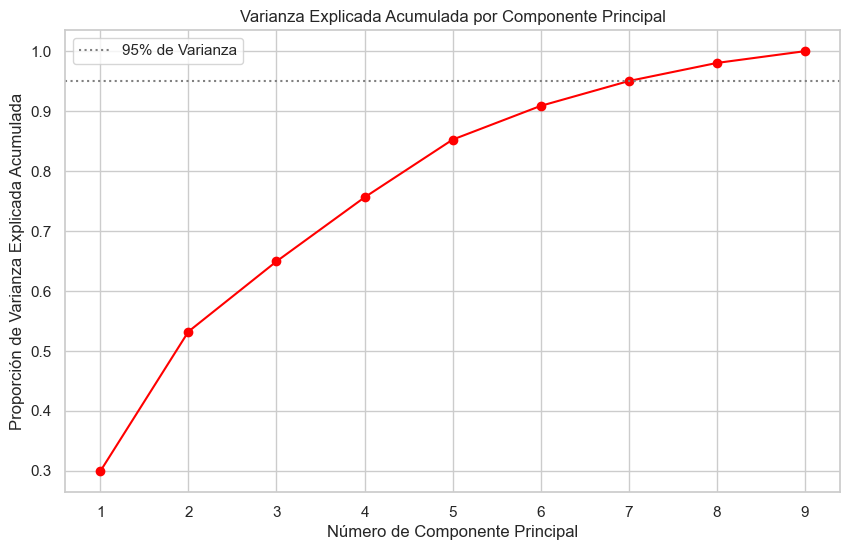

In [71]:
# --- Graficamos la varianza explicada acumulada ---
print("\n### Graficamos la varianza explicada acumulada")
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='-', color='red')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.xticks(range(1, len(varianza_explicada_acumulada) + 1))
plt.grid(True)
plt.axhline(y=0.95, color='gray', linestyle=':', label='95% de Varianza') # Opcional: línea de referencia para el 95%
plt.legend()
plt.show()


Varianza explicada acumulada:
Hasta PC1: 0.2991 (29.91%)
Hasta PC2: 0.5321 (53.21%)
Hasta PC3: 0.6492 (64.92%)
Hasta PC4: 0.7561 (75.61%)
Hasta PC5: 0.8524 (85.24%)
Hasta PC6: 0.9087 (90.87%)
Hasta PC7: 0.9502 (95.02%)
Hasta PC8: 0.9803 (98.03%)
Hasta PC9: 1.0000 (100.00%)


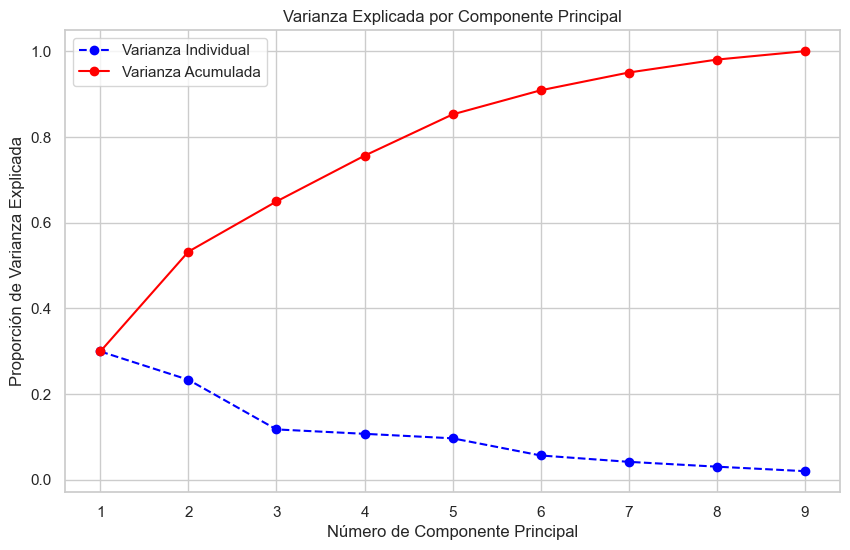

In [69]:
# Varianza explicada acumulada
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)
print("\nVarianza explicada acumulada:")
for i, ratio_acum in enumerate(varianza_explicada_acumulada):
    print(f"Hasta PC{i+1}: {ratio_acum:.4f} ({ratio_acum*100:.2f}%)")

# Opcional: Visualizar la varianza explicada y acumulada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_individual) + 1), varianza_explicada_individual, marker='o', linestyle='--', color='blue', label='Varianza Individual')
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='-', color='red', label='Varianza Acumulada')
plt.title('Varianza Explicada por Componente Principal')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Proporción de Varianza Explicada')
plt.xticks(range(1, len(varianza_explicada_individual) + 1))
plt.grid(True)
plt.legend()
plt.show()

### Veamos la correlación entre las nuevas componentes y las dimensiones originales
Representa en un mapa de calor los PCA vs las variables originales. Esta información la puedes obtener del atributo de PCA *components_*.


### Varianza explicada por cada Componente Principal:
PC1: 0.2991 (29.91%)
PC2: 0.2329 (23.29%)
PC3: 0.1171 (11.71%)
PC4: 0.1069 (10.69%)
PC5: 0.0964 (9.64%)
PC6: 0.0563 (5.63%)
PC7: 0.0415 (4.15%)
PC8: 0.0302 (3.02%)
PC9: 0.0197 (1.97%)

### Varianza explicada acumulada:
Hasta PC1: 0.2991 (29.91%)
Hasta PC2: 0.5321 (53.21%)
Hasta PC3: 0.6492 (64.92%)
Hasta PC4: 0.7561 (75.61%)
Hasta PC5: 0.8524 (85.24%)
Hasta PC6: 0.9087 (90.87%)
Hasta PC7: 0.9502 (95.02%)
Hasta PC8: 0.9803 (98.03%)
Hasta PC9: 1.0000 (100.00%)

### Varianza explicada por las primeras 5 Componentes Principales:
La varianza explicada por las primeras 5 Componentes Principales es: 0.8524 (85.24%)

  Graficamos la varianza explicada acumulada


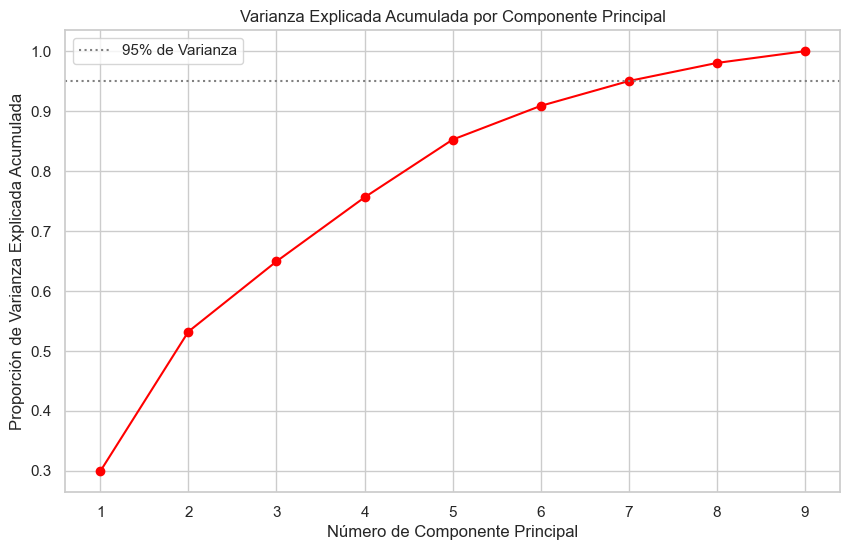


  Mapa de Calor: PCA vs. Variables Originales


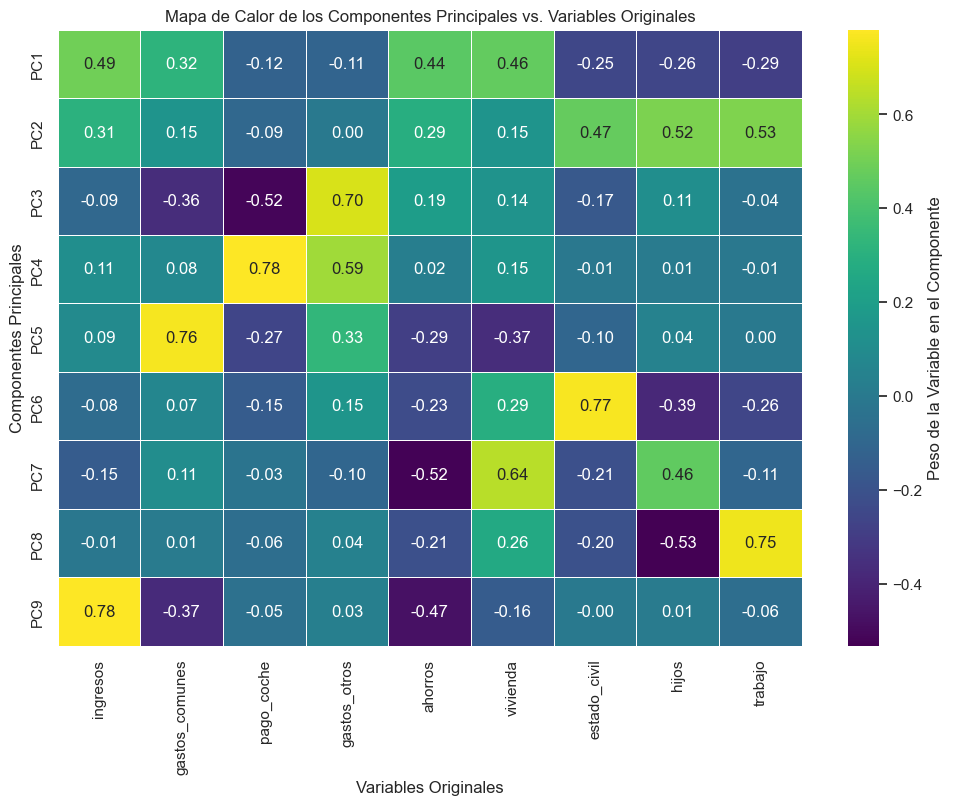


  Mapa de Calor (Valores Absolutos): Contribución de Variables a cada PC


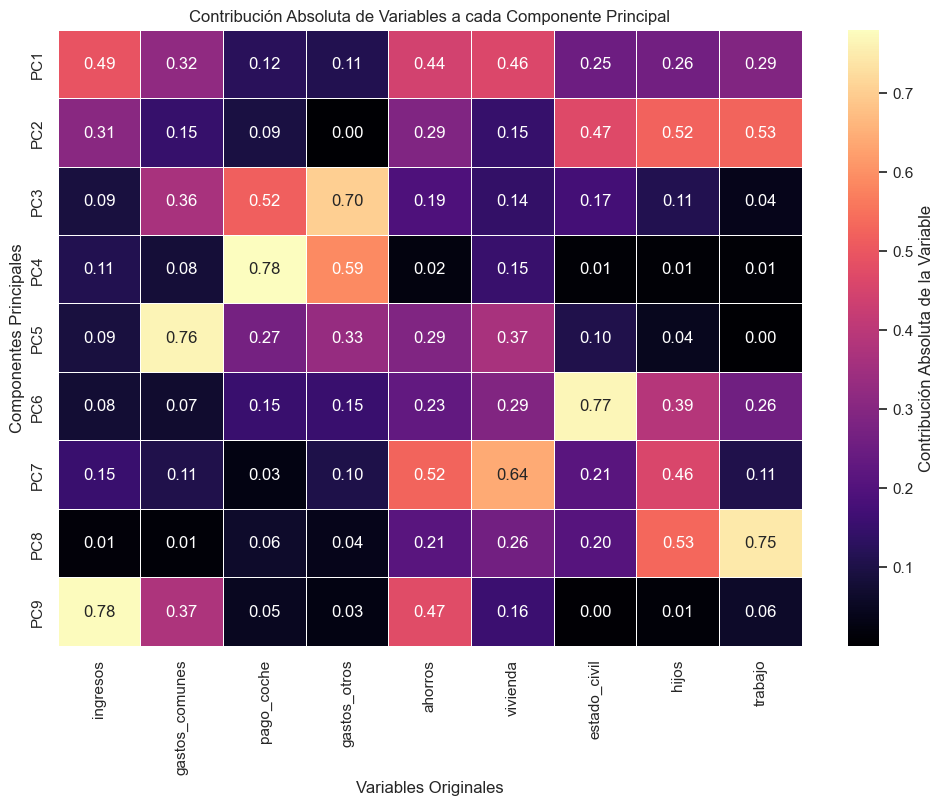

In [76]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Configuraciones visuales
sns.set(style="whitegrid", palette="muted")

# --- PASO 1: Cargar los datos y separar X e Y ---
# Cargar el dataset con la ruta correcta

df = pd.read_csv('data/comprar_alquilar.csv')



# Definir las características (X) y la variable objetivo (y)
features = ['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo']
X = df[features]
y = df['comprar']

# --- PASO 2: Escalar los datos y aplicar PCA ---
# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA (no limitamos el número de componentes para ver la varianza de todos)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)


# --- Pregunta 1: ¿Cuánta varianza explica cada Principal Component? ---
varianza_explicada_individual = pca.explained_variance_ratio_
print("\n### Varianza explicada por cada Componente Principal:")
for i, ratio in enumerate(varianza_explicada_individual):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

# --- Pregunta 2: ¿Y de manera acumulada empezando por el PC1? ---
varianza_explicada_acumulada = np.cumsum(pca.explained_variance_ratio_)
print("\n### Varianza explicada acumulada:")
for i, ratio_acum in enumerate(varianza_explicada_acumulada):
    print(f"Hasta PC{i+1}: {ratio_acum:.4f} ({ratio_acum*100:.2f}%)")

# --- Pregunta 3: ¿Cuánta varianza explicarían sólo 5 componentes? ---
if len(varianza_explicada_acumulada) >= 5:
    varianza_5_componentes = varianza_explicada_acumulada[4] # El índice es 4 porque es base 0 (PC1 es índice 0)
    print(f"\n### Varianza explicada por las primeras 5 Componentes Principales:")
    print(f"La varianza explicada por las primeras 5 Componentes Principales es: {varianza_5_componentes:.4f} ({varianza_5_componentes*100:.2f}%)")
else:
    print("\nNo hay suficientes componentes para calcular la varianza explicada por 5 componentes.")


# --- Graficamos la varianza explicada acumulada ---
print("\n  Graficamos la varianza explicada acumulada")
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(varianza_explicada_acumulada) + 1), varianza_explicada_acumulada, marker='o', linestyle='-', color='red')
plt.title('Varianza Explicada Acumulada por Componente Principal')
plt.xlabel('Número de Componente Principal')
plt.ylabel('Proporción de Varianza Explicada Acumulada')
plt.xticks(range(1, len(varianza_explicada_acumulada) + 1))
plt.grid(True)
plt.axhline(y=0.95, color='gray', linestyle=':', label='95% de Varianza') # Opcional: línea de referencia para el 95%
plt.legend()
plt.show()

# --- Mapa de Calor de PCA vs. Variables Originales ---
print("\n  Mapa de Calor: PCA vs. Variables Originales")

# Crear un DataFrame para visualizar mejor los componentes
# Las filas son los PC y las columnas son las variables originales
# Esta línea causaba el error si 'features' y 'pca' no estaban definidas
componentes_df = pd.DataFrame(pca.components_, columns=features, index=[f'PC{i+1}' for i in range(len(features))])

plt.figure(figsize=(12, 8))
sns.heatmap(componentes_df, cmap='viridis', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"label": "Peso de la Variable en el Componente"})
plt.title('Mapa de Calor de los Componentes Principales vs. Variables Originales')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.show()

# Opcional: Para entender mejor la interpretación, puedes ver los valores absolutos
print("\n  Mapa de Calor (Valores Absolutos): Contribución de Variables a cada PC")
plt.figure(figsize=(12, 8))
sns.heatmap(np.abs(componentes_df), cmap='magma', annot=True, fmt=".2f", linewidths=.5, cbar_kws={"label": "Contribución Absoluta de la Variable"})
plt.title('Contribución Absoluta de Variables a cada Componente Principal')
plt.xlabel('Variables Originales')
plt.ylabel('Componentes Principales')
plt.show()

## Predicciones
1. Divide en train y test
2. Prepara un pipeline compuesto por:
    - StandardScaler,
    - PCA de 5 componentes
    - Un clasificador
3. Entrena
4. Predice con test
5. Calcula el accuracy score en train y test
6. Representa la matriz de confusión
7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test?
8. Vuelve a iterar de nuevo con un gridsearch
9. Guarda tu mejor modelo

DataFrame cargado exitosamente desde 'data/comprar_alquilar.csv'.

--- PASO 1: Dividiendo en conjuntos de entrenamiento y prueba ---
Tamaño del conjunto de entrenamiento (X_train): (141, 9)
Tamaño del conjunto de prueba (X_test): (61, 9)

--- PASO 2: Preparando el Pipeline ---
Pipeline creado con StandardScaler, PCA (5 componentes) y LogisticRegression.

--- PASO 3: Entrenando el modelo ---
Modelo entrenado correctamente.

--- PASO 4: Realizando predicciones ---

--- PASO 5: Calculando Accuracy Scores ---
Accuracy en el conjunto de entrenamiento: 0.8156
Accuracy en el conjunto de prueba: 0.6721

--- PASO 6: Representando la Matriz de Confusión ---


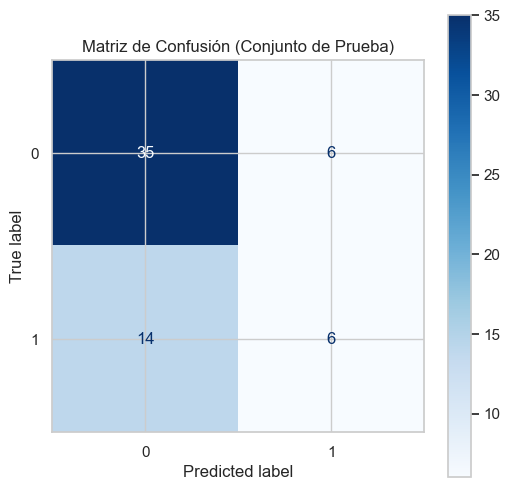


Análisis de la Matriz de Confusión:
True Positives (TP): 6 (predijo 'comprar' y fue 'comprar')
True Negatives (TN): 35 (predijo 'alquilar' y fue 'alquilar')
False Positives (FP): 6 (predijo 'comprar' pero fue 'alquilar')
False Negatives (FN): 14 (predijo 'alquilar' pero fue 'comprar')


In [74]:
# Importar librerías necesarias (asegúrate de que ya las tienes al principio de tu notebook)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib # Para guardar el modelo

# Configuraciones visuales
sns.set(style="whitegrid", palette="muted")

df = pd.read_csv('data/comprar_alquilar.csv')
print("DataFrame cargado exitosamente desde 'data/comprar_alquilar.csv'.")

# Definir las características (X) y la variable objetivo (y)
features = ['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo']
X = df[features]
y = df['comprar']

# --- 1. Divide en train y test ---
print("\n--- PASO 1: Dividiendo en conjuntos de entrenamiento y prueba ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")


# --- 2. Prepara un pipeline ---
print("\n--- PASO 2: Preparando el Pipeline ---")
# Definir el clasificador
classifier = LogisticRegression(random_state=42)

# Crear el pipeline
# PCA con 5 componentes, como se solicitó inicialmente
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)), # PCA con 5 componentes
    ('classifier', classifier)
])
print("Pipeline creado con StandardScaler, PCA (5 componentes) y LogisticRegression.")


# --- 3. Entrena el modelo ---
print("\n--- PASO 3: Entrenando el modelo ---")
pipeline.fit(X_train, y_train)
print("Modelo entrenado correctamente.")


# --- 4. Predice con test ---
print("\n--- PASO 4: Realizando predicciones ---")
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)


# --- 5. Calcula el accuracy score en train y test ---
print("\n--- PASO 5: Calculando Accuracy Scores ---")
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy en el conjunto de entrenamiento: {accuracy_train:.4f}")
print(f"Accuracy en el conjunto de prueba: {accuracy_test:.4f}")


# --- 6. Representa la matriz de confusión ---
print("\n--- PASO 6: Representando la Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline.classes_)

fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(cmap=plt.cm.Blues, ax=ax)
ax.set_title('Matriz de Confusión (Conjunto de Prueba)')
plt.show()

print("\nAnálisis de la Matriz de Confusión:")
print(f"True Positives (TP): {cm[1, 1]} (predijo 'comprar' y fue 'comprar')")
print(f"True Negatives (TN): {cm[0, 0]} (predijo 'alquilar' y fue 'alquilar')")
print(f"False Positives (FP): {cm[0, 1]} (predijo 'comprar' pero fue 'alquilar')")
print(f"False Negatives (FN): {cm[1, 0]} (predijo 'alquilar' pero fue 'comprar')")

DataFrame cargado exitosamente desde 'data/comprar_alquilar.csv'.

--- Dividiendo en conjuntos de entrenamiento y prueba ---
Tamaño del conjunto de entrenamiento (X_train): (141, 9)
Tamaño del conjunto de prueba (X_test): (61, 9)

--- Preparando el Pipeline ---
Pipeline creado con StandardScaler, PCA y LogisticRegression.

--- Entrenando el modelo inicial (PCA=5) ---
Accuracy del modelo inicial (PCA=5) en entrenamiento: 0.8156
Accuracy del modelo inicial (PCA=5) en prueba: 0.6721


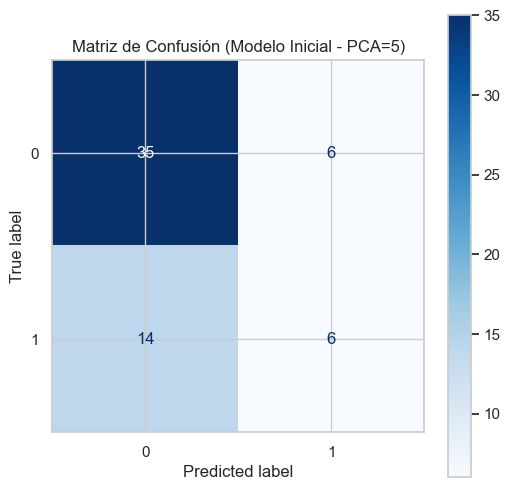


--- PASOS 7 y 8: Optimizando con GridSearchCV ---
Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\inaki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\inaki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\inaki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\inaki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\inaki\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the 


Mejores parámetros encontrados por GridSearchCV:
{'classifier__C': 100, 'classifier__solver': 'liblinear', 'pca__n_components': 9}
Mejor score de validación cruzada (accuracy): 0.9362

Accuracy del MEJOR MODELO (encontrado por GridSearchCV) en el conjunto de prueba: 0.9344

Matriz de Confusión del Mejor Modelo (Conjunto de Prueba):


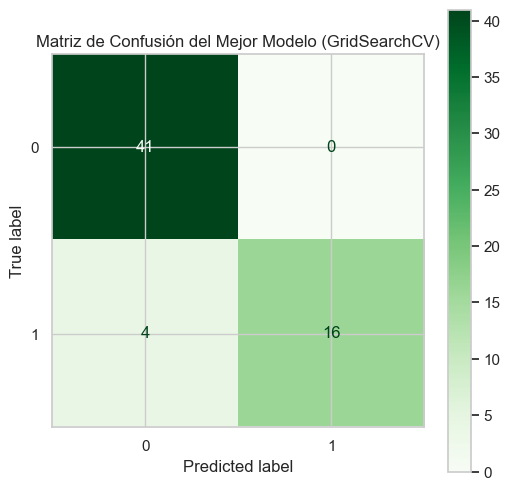


--- PASO 9: Guardando el mejor modelo ---
Mejor modelo guardado como 'mejor_modelo_pca_clasificacion.joblib'

¡Todos los ejercicios han sido completados exitosamente!


In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import joblib # Para guardar el modelo

# Configuraciones visuales
sns.set(style="whitegrid", palette="muted")

# Cargar el dataset 

df = pd.read_csv('data/comprar_alquilar.csv')

# Definir las características (X) y la variable objetivo (y)
features = ['ingresos', 'gastos_comunes', 'pago_coche', 'gastos_otros', 'ahorros', 'vivienda', 'estado_civil', 'hijos', 'trabajo']
X = df[features]
y = df['comprar']

# --- Dividir en train y test ---
print("\n--- Dividiendo en conjuntos de entrenamiento y prueba ---")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")

# --- Preparar el pipeline (con PCA sin n_components específico aquí para optimizarlo) ---
print("\n--- Preparando el Pipeline ---")
classifier = LogisticRegression(random_state=42)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA()), # PCA sin n_components definido, se optimizará
    ('classifier', classifier)
])
print("Pipeline creado con StandardScaler, PCA y LogisticRegression.")

# --- Entrenar, predecir y calcular accuracy del modelo inicial (sin GridSearch) ---
# Esto es para tener el rendimiento de la configuración inicial de PCA=5
print("\n--- Entrenando el modelo inicial (PCA=5) ---")
pipeline_initial = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=5)), # PCA con 5 componentes para la evaluación inicial
    ('classifier', LogisticRegression(random_state=42))
])
pipeline_initial.fit(X_train, y_train)
y_train_pred_initial = pipeline_initial.predict(X_train)
y_test_pred_initial = pipeline_initial.predict(X_test)
accuracy_train_initial = accuracy_score(y_train, y_train_pred_initial)
accuracy_test_initial = accuracy_score(y_test, y_test_pred_initial)
print(f"Accuracy del modelo inicial (PCA=5) en entrenamiento: {accuracy_train_initial:.4f}")
print(f"Accuracy del modelo inicial (PCA=5) en prueba: {accuracy_test_initial:.4f}")

# Matriz de confusión del modelo inicial
cm_initial = confusion_matrix(y_test, y_test_pred_initial)
disp_initial = ConfusionMatrixDisplay(confusion_matrix=cm_initial, display_labels=pipeline_initial.classes_)
fig_initial, ax_initial = plt.subplots(figsize=(6, 6))
disp_initial.plot(cmap=plt.cm.Blues, ax=ax_initial)
ax_initial.set_title('Matriz de Confusión (Modelo Inicial - PCA=5)')
plt.show()


# --- 7. ¿Qué combinación de parámetros y componentes mejoraría el accuracy en test? ---
# --- 8. Vuelve a iterar de nuevo con un gridsearch ---
print("\n--- PASOS 7 y 8: Optimizando con GridSearchCV ---")

# Definir la cuadrícula de parámetros a buscar
param_grid = {
    'pca__n_components': range(1, len(features) + 1), # Desde 1 hasta el número total de características
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__solver': ['liblinear', 'saga']
}

# Configurar GridSearchCV
# cv=5: 5-fold cross-validation
# scoring='accuracy': métrica a optimizar
# n_jobs=1: Se ha cambiado de -1 a 1 para evitar problemas de multiprocessing.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=1, verbose=1)

# Ejecutar la búsqueda en la cuadrícula sobre los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print("\nMejores parámetros encontrados por GridSearchCV:")
print(grid_search.best_params_)

# Mostrar el mejor score de validación cruzada
print(f"Mejor score de validación cruzada (accuracy): {grid_search.best_score_:.4f}")

# --- Evaluar el mejor modelo en el conjunto de prueba ---
best_model = grid_search.best_estimator_
y_test_pred_best = best_model.predict(X_test)
accuracy_test_best = accuracy_score(y_test, y_test_pred_best)
print(f"\nAccuracy del MEJOR MODELO (encontrado por GridSearchCV) en el conjunto de prueba: {accuracy_test_best:.4f}")

# Representar la matriz de confusión del mejor modelo
print("\nMatriz de Confusión del Mejor Modelo (Conjunto de Prueba):")
cm_best = confusion_matrix(y_test, y_test_pred_best)
disp_best = ConfusionMatrixDisplay(confusion_matrix=cm_best, display_labels=best_model.classes_)

fig_best, ax_best = plt.subplots(figsize=(6, 6))
disp_best.plot(cmap=plt.cm.Greens, ax=ax_best) # Usando un cmap diferente para distinguirlo
ax_best.set_title('Matriz de Confusión del Mejor Modelo (GridSearchCV)')
plt.show()

